# VGG Network

- [VGG intro](https://youtu.be/akFO1sH7Q_0)
- [VGG Paper](https://arxiv.org/pdf/1409.1556.pdf)


###  VGG in Keras

- We can fairly quickly utilize a pre-trained model with [Keras Applications](https://keras.io/api/applications).

- VGG16 is one of the built-in models supported. 
- There are actually two versions of VGG
   - VGG16 and VGG19 
   - The numbers denote the number of layers included in each respective model
- We can utilize either with Keras, but we'll work with VGG16 here.



In [2]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet', include_top=False)

There are two arguments to VGG16 in this example, although there could be more or less.
- The first, **weights='imagenet'**, loads the pre-trained ImageNet weights. 
    - This is actually the default argument per the documentation, so if you don't include it, you should still be loading the ImageNet weights.
    
- We can also specify **None** to get random weights if you just want the architecture of VGG16; 
    - This is not suggested here since you won't get the benefit of transfer learning.

- The argument **include_top** is for whether we want to include the fully-connected layer at the top of the network; 
    - unless we are actually trying to classify ImageNet's 1,000 classes, you likely want to set this to **False** and add your own additional layer for the output you desire.


### Pre-processing for ImageNet weights

There is another item to consider before jumping into using an ImageNet pre-trained model. These networks are typically pre-trained with a specific type of pre-processing, so you need to make sure to use the same pre-processing steps, or your network's outputs will likely be erratic.

VGG uses 224x224 images as input, so that's another thing to consider.

(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


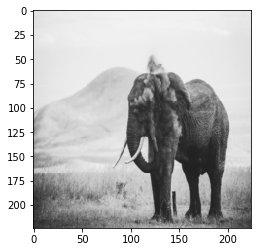

In [23]:
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

from keras.applications.vgg16 import preprocess_input


img_path = 'images/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
print(x.shape)

x = np.expand_dims(x, axis=0)
print(x.shape)

x = preprocess_input(x)
print(x.shape)

plt.imshow(img)

In [29]:
# Note - this will likely need to download a new version of VGG16
from keras.applications.vgg16 import VGG16, decode_predictions

# Load the pre-trained model
model = VGG16(weights='imagenet')

# Perform inference on our pre-processed image
predictions = model.predict(x)

#print(type(predictions), predictions)

print(decode_predictions(predictions, top=3)[0])
# Check the top 3 predictions of the model
print('Predicted:', decode_predictions(predictions, top=3)[0])

[('n01871265', 'tusker', 0.72201943), ('n02504458', 'African_elephant', 0.17709614), ('n02504013', 'Indian_elephant', 0.093799315)]
